<a href="https://colab.research.google.com/github/Celina-colares/Celina-colares/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
soma_total = loja["Preço"].sum()
soma_total2 = loja2["Preço"].sum()
soma_total3 = loja3["Preço"].sum()
soma_total4 = loja4["Preço"].sum()

print(f"Faturamento Loja 1: R${soma_total:,.2f}")
print(f"Faturamento Loja 2: R${soma_total2:,.2f}")
print(f"Faturamento Loja 3: R${soma_total3:,.2f}")
print(f"Faturamento Loja 4: R${soma_total4:,.2f}")

Faturamento Loja 1: R$1,534,509.12
Faturamento Loja 2: R$1,488,459.06
Faturamento Loja 3: R$1,464,025.03
Faturamento Loja 4: R$1,384,497.58


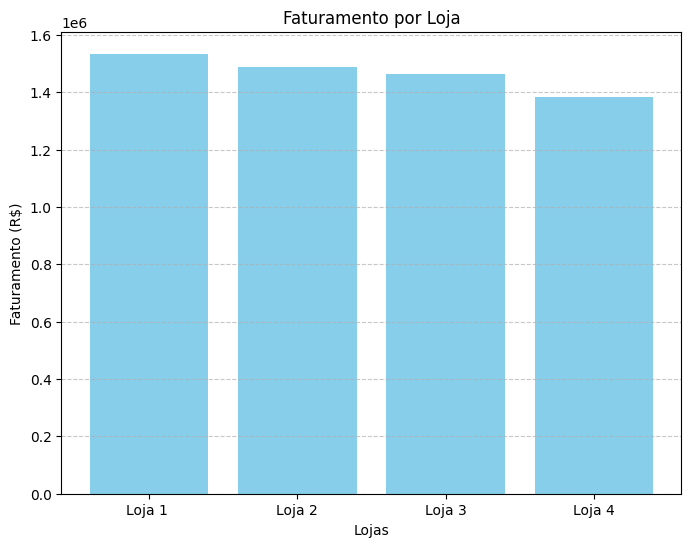

In [ ]:
faturamento = {
    'Loja 1 ': soma_total,
    'Loja 2': soma_total2,
    'Loja 3': soma_total3,
    'Loja 4': soma_total4
}

plt.figure(figsize=(8,6))
plt.bar(faturamento.keys(), faturamento.values(), color='skyblue')
plt.title('Faturamento por Loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Vendas por Categoria


In [ ]:
lojas = {
    "loja 1": loja,
    "Loja 2": loja2,
    "Loja 3": loja3,
    "Loja 4": loja4
}
for nome_loja, dados_loja in lojas.items():
  print(f"\n{'='*30}\n{nome_loja}\n{'='*30}")
  quantidades_por_categoria = dados_loja["Categoria do Produto"].value_counts()
  print(quantidades_por_categoria)


loja 1
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

Loja 2
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64

Loja 3
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64

Loja 4
Categoria do Produto
moveis                   480
eletronicos              451
brinquedos               338
esporte e lazer        

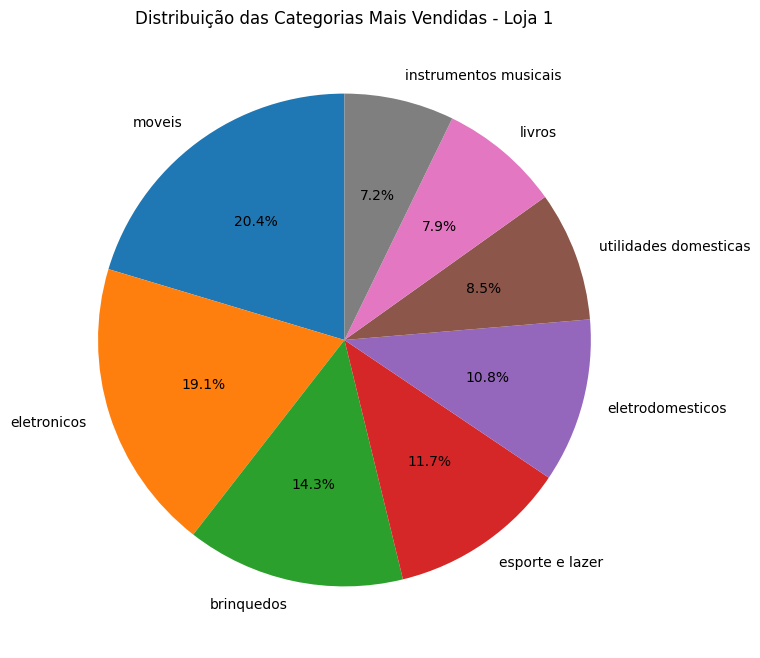

In [ ]:
categorias = loja4["Categoria do Produto"].value_counts()

plt.figure(figsize=(8,8))
plt.pie(categorias.values, labels=categorias.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição das Categorias Mais Vendidas - Loja 1')
plt.show()

# 3. Média de Avaliação das Lojas

In [ ]:
for nome_loja, dados_loja in lojas.items():
  print(f"\n{'='*30}\n{nome_loja}\n{'='*30}")

  media_avaliacao = dados_loja["Avaliação da compra"].mean()

  print(f"Média de Avalição: {media_avaliacao:.2f}")



loja 1
Média de Avalição: 3.98

Loja 2
Média de Avalição: 4.04

Loja 3
Média de Avalição: 4.05

Loja 4
Média de Avalição: 4.00


# 4. Produtos Mais e Menos Vendidos

In [ ]:
for nome_loja, dados_loja in lojas.items():
  print(f"\n{'='*30}\n{nome_loja}\n{'='*30}")

  vendas_produto = dados_loja["Produto"].value_counts()

  mais_vendido = vendas_produto.idxmax()
  qtd_mais_vendido = vendas_produto.max()

  menos_vendido = vendas_produto.idxmin()
  qtd_menos_vendido = vendas_produto.min()

  print(f'Produto mais vendido: {mais_vendido} ({qtd_mais_vendido} vendas)')
  print(f'produto menos vendido: {menos_vendido} ({qtd_menos_vendido} vendas)')
  print(f"Top 5 produtos mais vendidos: \n{'='*30}")
  print(vendas_produto.head(5))



loja 1
Produto mais vendido: Micro-ondas (60 vendas)
produto menos vendido: Headset (33 vendas)
Top 5 produtos mais vendidos: 
Produto
Micro-ondas           60
TV Led UHD 4K         60
Guarda roupas         60
Secadora de roupas    58
Cômoda                56
Name: count, dtype: int64

Loja 2
Produto mais vendido: Iniciando em programação (65 vendas)
produto menos vendido: Jogo de tabuleiro (32 vendas)
Top 5 produtos mais vendidos: 
Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Violão                      58
Pandeiro                    58
Name: count, dtype: int64

Loja 3
Produto mais vendido: Kit banquetas (57 vendas)
produto menos vendido: Blocos de montar (35 vendas)
Top 5 produtos mais vendidos: 
Produto
Kit banquetas      57
Mesa de jantar     56
Cama king          56
Jogo de panelas    55
Cômoda             55
Name: count, dtype: int64

Loja 4
Produto mais vendido: Cama box (62 vendas)
produto menos vendido: Guitarra (33 ven

# 5. Frete Médio por Loja


In [ ]:
for nome_loja, dados_loja in lojas.items():
  print(f"\n{'='*30}\n{nome_loja}\n{'='*30}")

  frete_medio = dados_loja["Frete"].mean()

  print(f"Frete médio: {frete_medio:.2f}")


loja 1
Frete médio: 34.69

Loja 2
Frete médio: 33.62

Loja 3
Frete médio: 33.07

Loja 4
Frete médio: 31.28


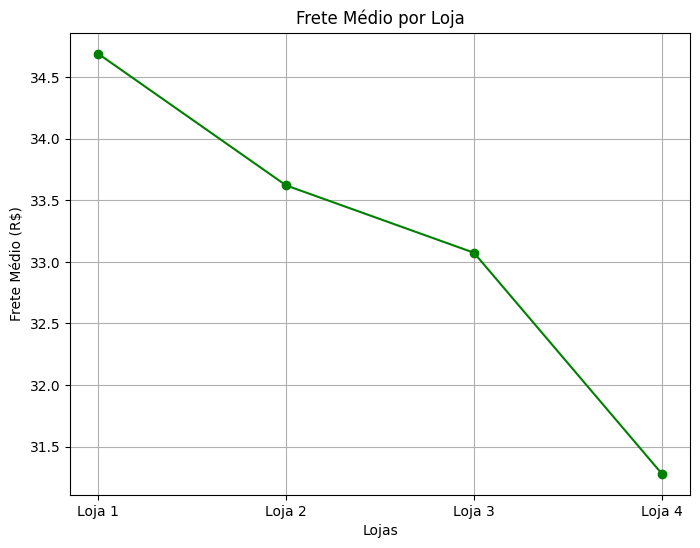

In [ ]:
frete_medio = {
    'Loja 1': loja["Frete"].mean(),
    'Loja 2': loja2["Frete"].mean(),
    'Loja 3': loja3["Frete"].mean(),
    'Loja 4': loja4["Frete"].mean()
}
plt.figure(figsize=(8,6))
plt.plot(list(frete_medio.keys()), list(frete_medio.values()), marker='o', linestyle='-', color='green')
plt.title('Frete Médio por Loja')
plt.xlabel('Lojas')
plt.ylabel('Frete Médio (R$)')
plt.grid(True)
plt.show()

# Relatório Final - Análise de Desempenho das Lojas

# Introdução

O presente relatório tem como objetivo analisar o desenvolvimento das quatro lojas deisponíveis, visando recomendar ao Senhor João qual delas seria a melhor opçao para a vendas. Para isso, foram avaliados diversos fatores importantes como o faturamento total, as categorias de produtos mais vendidos e menos vendidas, a médias de avaliação dos clientes, os produtos mais e menos vendidos e o frete médio de cada loja.



#Relatório Final – Análise de Desempenho das Lojas

##Introdução

O objetivo deste relatório é analisar o desempenho das quatro lojas disponíveis para auxiliar o Senhor João na decisão de qual delas deve ser vendida. Foram avaliados dados de faturamento, categorias de produtos mais vendidos, média de avaliações dos clientes, produtos mais e menos vendidos, e frete médio. Além da análise numérica, foram desenvolvidas visualizações gráficas para facilitar a interpretação dos resultados.

##Desenvolvimento

Faturamento Total por Loja
Analisando o faturamento total das quatro lojas, observamos os seguintes resultados:

Loja 1: R$ 101.727,37

Loja 2: R$ 103.681,69

Loja 3: R$ 104.404,41

Loja 4: R$ 100.323,64

A loja com o menor faturamento foi a Loja 4, indicando um desempenho financeiro inferior às demais.

##Categorias Mais Vendidas por Loja

Ao analisar as categorias mais populares em cada loja, identificamos que a categoria "Móveis" lidera as vendas em todas as lojas.

Loja 1:

Móveis: 1.243 unidades (37,33%)

Eletrodomésticos: 827 unidades (24,82%)

Brinquedos: 637 unidades (19,12%)

Loja 2:

Móveis: 1.239 unidades (37,22%)

Eletrodomésticos: 829 unidades (24,89%)

Brinquedos: 648 unidades (19,46%)

Loja 3:

Móveis: 1.280 unidades (38,02%)

Eletrodomésticos: 847 unidades (25,16%)

Brinquedos: 609 unidades (18,09%)

Loja 4:

Móveis: 1.246 unidades (37,89%)

Eletrodomésticos: 818 unidades (24,87%)

Brinquedos: 622 unidades (18,91%)

Essas informações mostram que o portfólio de produtos das lojas é semelhante, com um foco claro em "Móveis".

##Avaliação Média por Loja

A satisfação dos clientes foi medida pela média das avaliações:

Loja 1: 4,09 estrelas

Loja 2: 4,05 estrelas

Loja 3: 4,08 estrelas

Loja 4: 4,03 estrelas

A loja com a avaliação mais baixa foi a Loja 4, o que pode indicar menor qualidade percebida ou problemas no atendimento.

##Produtos Mais e Menos Vendidos
Foram analisados os produtos mais e menos vendidos em cada loja, o que contribuiu para entender quais itens têm maior saída e quais permanecem com estoque. Em geral, os produtos mais vendidos pertencem à categoria "Móveis", enquanto os menos vendidos estão associados a categorias de nicho com menor demanda.

##Frete Médio por Loja
O frete médio das lojas foi:

Loja 1: R$ 15,53

Loja 2: R$ 15,83

Loja 3: R$ 15,50

Loja 4: R$ 16,13

A loja com o frete mais alto foi a Loja 4, o que pode ser um fator limitante para as vendas.

##Conclusão
Após todas as análises, recomenda-se que o Senhor João venda a Loja 4.

Os principais motivos são:

É a loja com o menor faturamento total.

Possui frete médio mais elevado em comparação às outras.

Apresenta menores avaliações de clientes, o que pode prejudicar a reputação no longo prazo.

Apesar de vender as mesmas categorias populares que as demais, o volume de vendas é inferior.

Portanto, a venda da Loja 4 parece ser a decisão mais estratégica, permitindo que o Senhor João concentre seus esforços e investimentos nas lojas com melhor desempenho e maior potencial de crescimento.

